Que:1
I have a food delivery time prediction dataset, and I want to build a model using a boosting algorithm. The model’s accuracy should be above 80%.


In [483]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#  Outliers Removal
from scipy.stats import zscore
# Model Training
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.preprocessing import StandardScaler
#Evaluation metric
from sklearn.metrics import r2_score

In [484]:
# Storing the csv file in form of a DataFrame
delivery_time_df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\Food_Delivery_Times.csv")

In [485]:
delivery_time_df.info()
# OBSERVATION -> There are 9 columns and 1000 records
""" Columns -> ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'] are object type
            -> ['Distance_km', 'Courier_Experience_yrs'] are float64
            -> ['Order_ID', 'Preparation_Time_min', 'Delivery_Time_min'] are int64  """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


" Columns -> ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'] are object type\n            -> ['Distance_km', 'Courier_Experience_yrs'] are float64\n            -> ['Order_ID', 'Preparation_Time_min', 'Delivery_Time_min'] are int64  "

In [486]:
### Checking for null values
missing_values=delivery_time_df.isnull().sum()
miss_percentage=missing_values * 100 / len(delivery_time_df)
missing_values_df=pd.DataFrame(data=[missing_values,miss_percentage],index=["Values","Percentage"])
missing_values_df.T

# OBSERVATION -> columns ["Weather","Traffic_Level","Time_of_Day","Courier_Experience_yrs"] has missing values but they are very less and can be handled

,Values,Percentage
Order_ID,0.0,0.0
Distance_km,0.0,0.0
Weather,30.0,3.0
Traffic_Level,30.0,3.0
Time_of_Day,30.0,3.0
Vehicle_Type,0.0,0.0
Preparation_Time_min,0.0,0.0
Courier_Experience_yrs,30.0,3.0
Delivery_Time_min,0.0,0.0


In [487]:
delivery_time_df.describe().T
# OBSERVATION -> The mean and median of the data is very close so there are less chances of outliers and data to be skewed

,count,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,500.500000,288.819436,1.00,250.750,500.50,750.2500,1000.00
Distance_km,1000.0,10.059970,5.696656,0.59,5.105,10.19,15.0175,19.99
Preparation_Time_min,1000.0,16.982000,7.204553,5.00,11.000,17.00,23.0000,29.00
Courier_Experience_yrs,970.0,4.579381,2.914394,0.00,2.000,5.00,7.0000,9.00
Delivery_Time_min,1000.0,56.732000,22.070915,8.00,41.000,55.50,71.0000,153.00


### Univariant Analysis

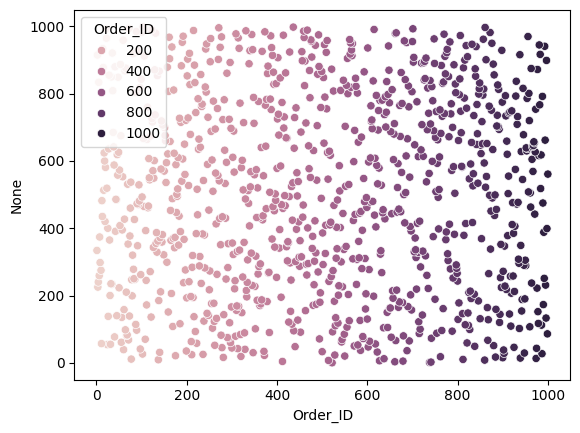

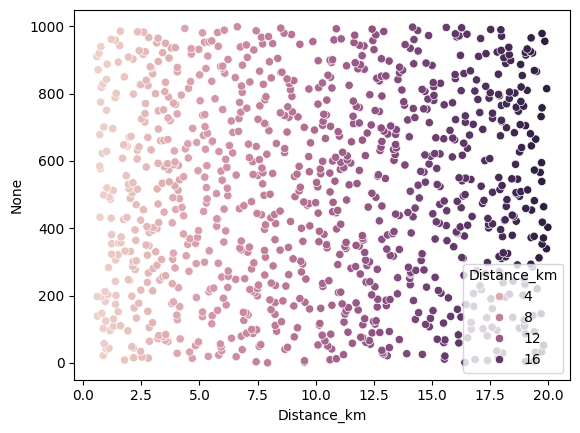

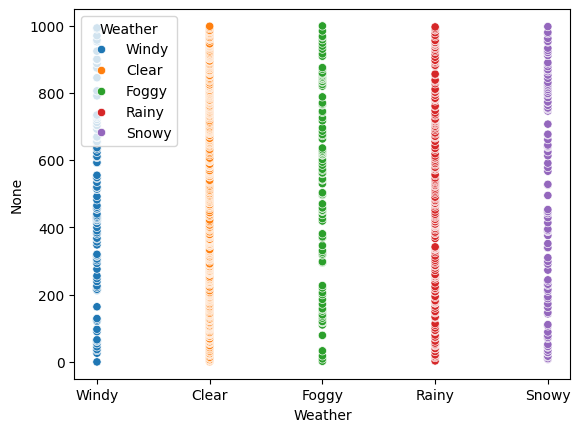

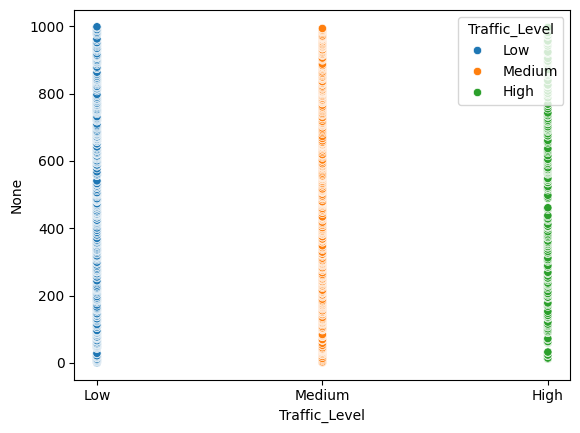

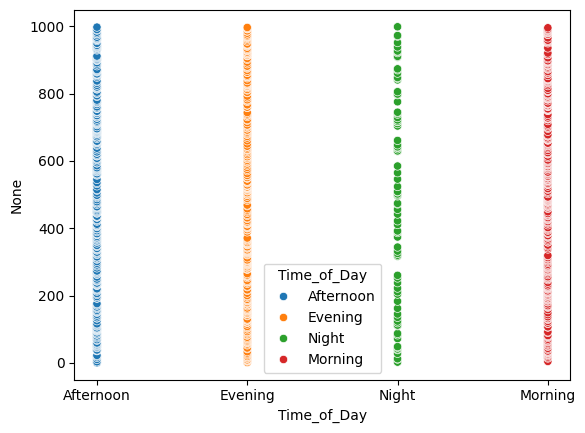

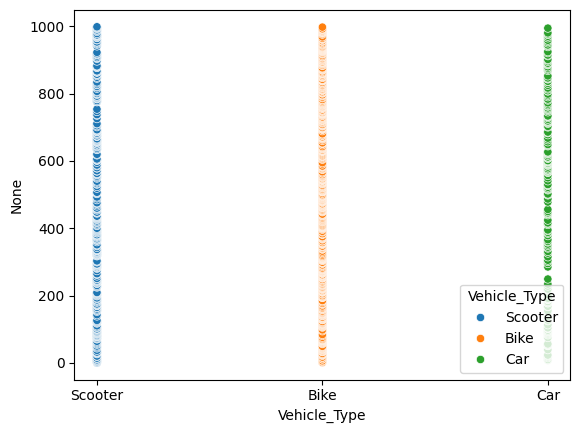

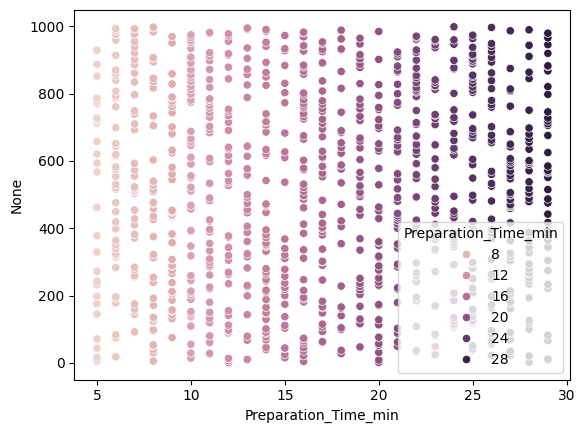

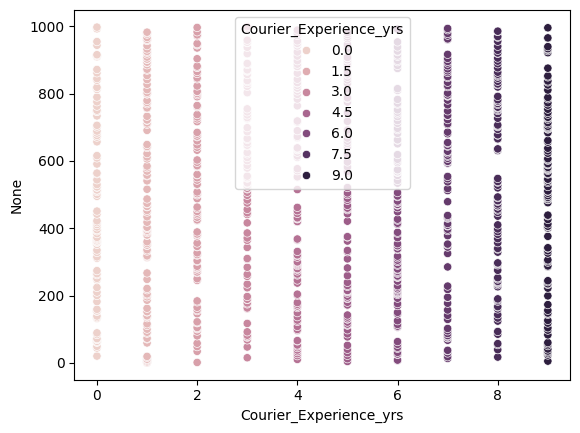

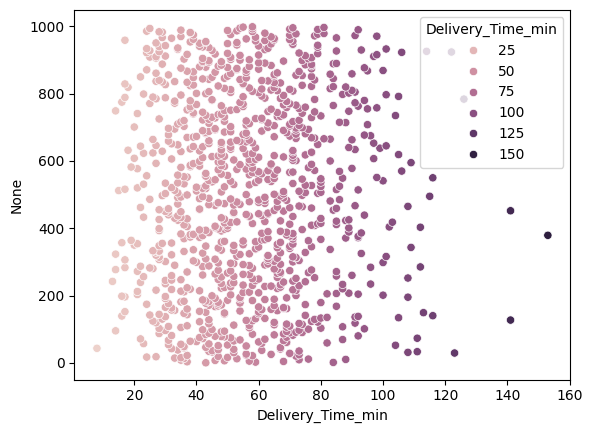

In [488]:
### using scatterplot to see the spreadness of the data
for col in delivery_time_df.columns:
    plt.figure()
    sns.scatterplot(x=delivery_time_df[col],data=delivery_time_df,y=delivery_time_df.index,hue=col)

### OBSERVATION -> All the values in numeric columns are evenly spread out apart from column ["Delivery_time_min"] where data is grouped a little 

' OBSERVATION -> Most deliveries happened when the weather was clear\n                -> Traffic was moderate and very few instances of high traffic\n                -> There were very few deliveries at night time\n                -> Mostly a two-wheeler was used for delivery \n                -> Maximum deliveries happend before 90 minutes  and the data is right skewed   '

<Figure size 640x480 with 0 Axes>

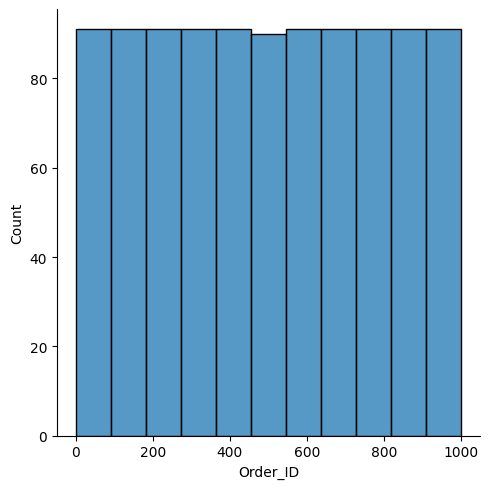

<Figure size 640x480 with 0 Axes>

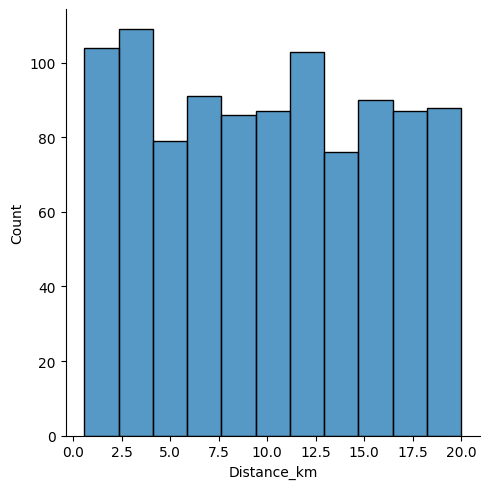

<Figure size 640x480 with 0 Axes>

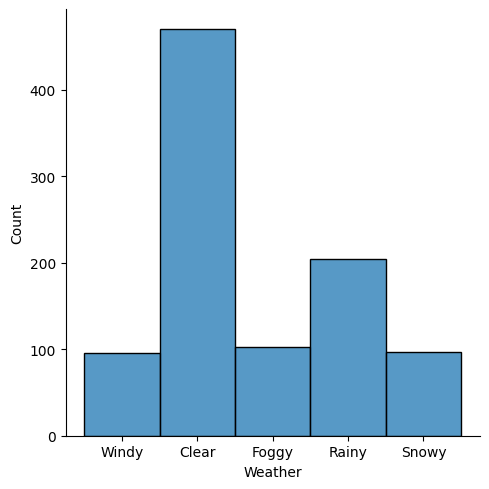

<Figure size 640x480 with 0 Axes>

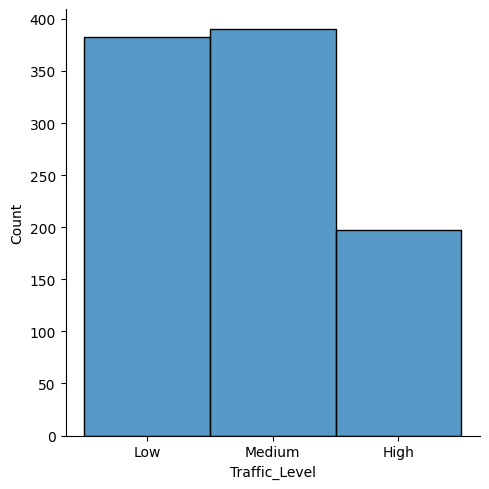

<Figure size 640x480 with 0 Axes>

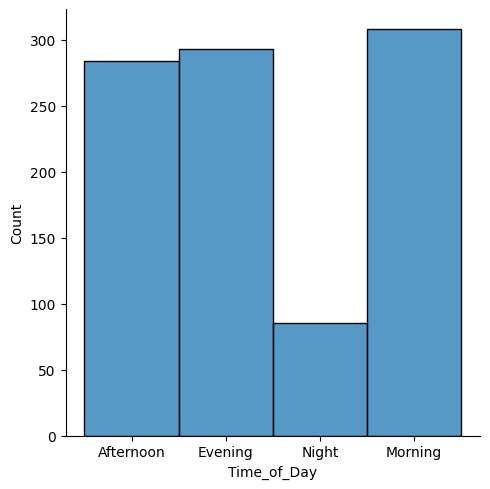

<Figure size 640x480 with 0 Axes>

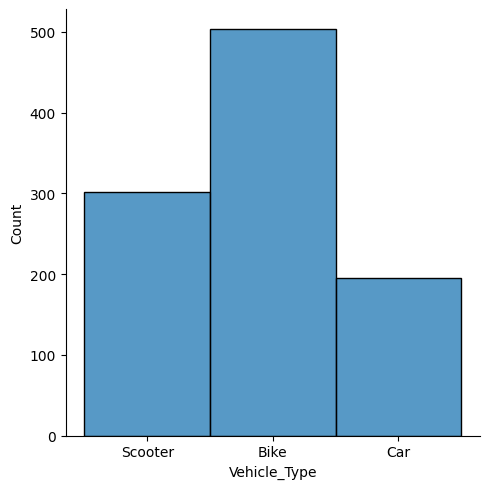

<Figure size 640x480 with 0 Axes>

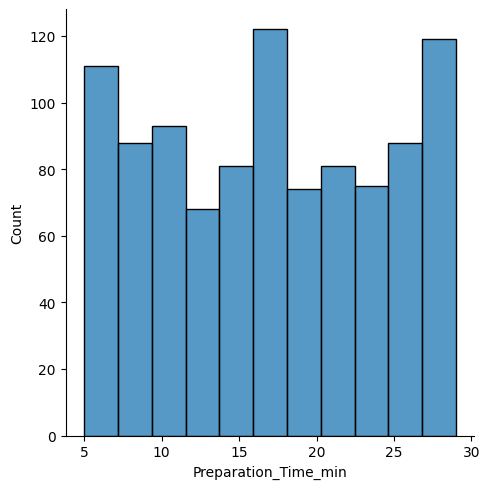

<Figure size 640x480 with 0 Axes>

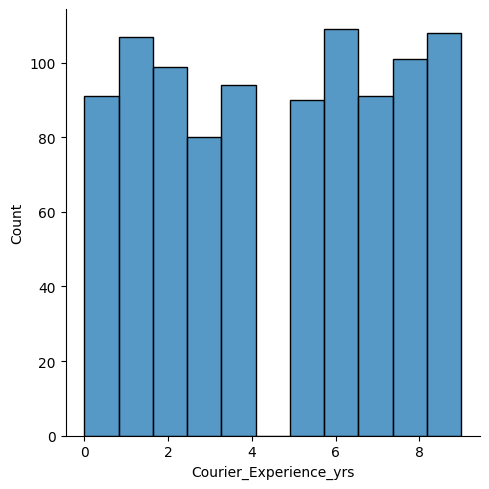

<Figure size 640x480 with 0 Axes>

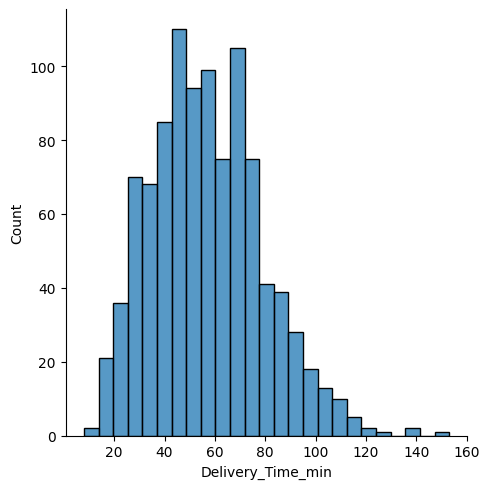

In [489]:
for col in delivery_time_df.columns:
    plt.figure()
    sns.displot(x=delivery_time_df[col],data=delivery_time_df)

""" OBSERVATION -> Most deliveries happened when the weather was clear
                -> Traffic was moderate and very few instances of high traffic
                -> There were very few deliveries at night time
                -> Mostly a two-wheeler was used for delivery 
                -> Maximum deliveries happend before 90 minutes  and the data is right skewed   """ 

### Encoding of categorical data

In [490]:
## Using LabelEncoding to convert object type data into numeric
encoding=LabelEncoder()
delivery_time_df["Weather"]=encoding.fit_transform(delivery_time_df["Weather"])
delivery_time_df["Traffic_Level"]=encoding.fit_transform(delivery_time_df["Traffic_Level"])
delivery_time_df["Time_of_Day"]=encoding.fit_transform(delivery_time_df["Time_of_Day"])
delivery_time_df["Vehicle_Type"]=encoding.fit_transform(delivery_time_df["Vehicle_Type"])

### Checking the corelation of columns with each other

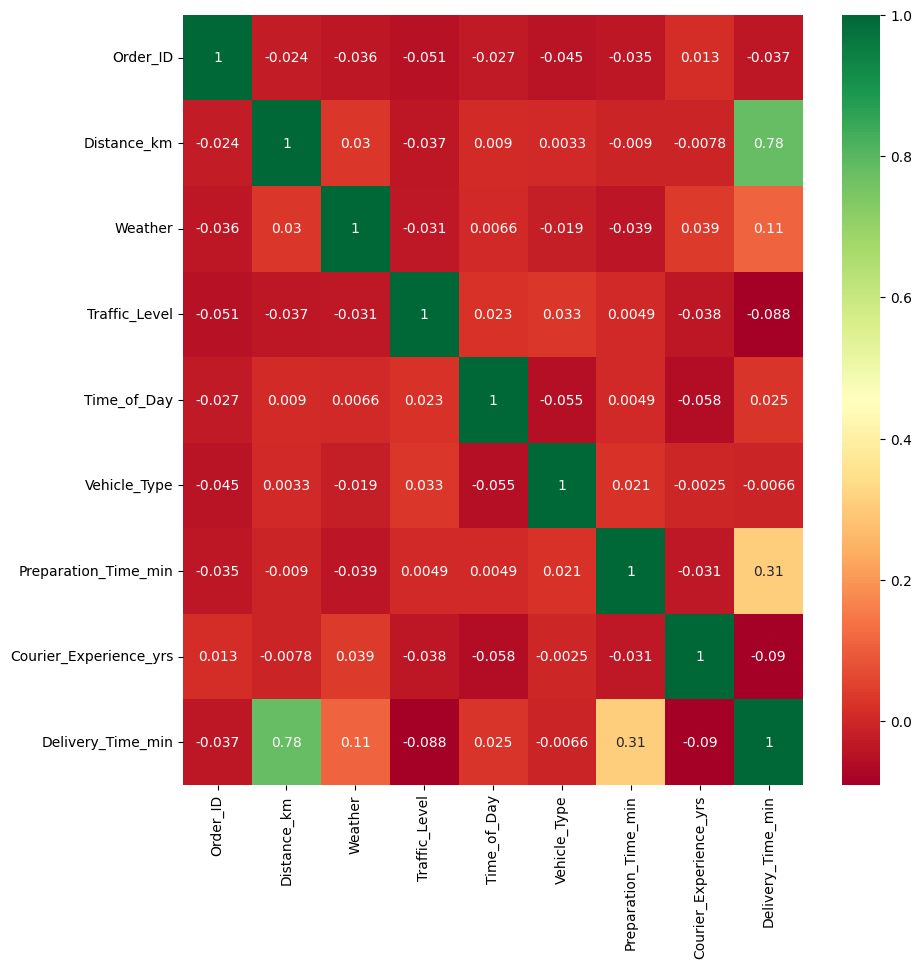

' OBSERVATION -> Columns ["Distance_km"] and ["Delivery_Time_min"] has high  multi colinearity .\n                -> Columns -> ["Delivery_Time_min"] and ["Traffic_level"] has very high multi colinearity \n                    Rest muti colinearity between the coluns are fine in range.\n                '

In [491]:
corr=delivery_time_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()
""" OBSERVATION -> Columns ["Distance_km"] and ["Delivery_Time_min"] has high  multi colinearity .
                -> Columns -> ["Delivery_Time_min"] and ["Traffic_level"] has very high multi colinearity 
                    Rest muti colinearity between the coluns are fine in range.
                """

In [492]:
### Since columns Order_ID will not provide any usefull information during the predictin it can be deleted
delivery_time_df.drop(["Order_ID"],axis=1,inplace=True)

### Checking for outliers

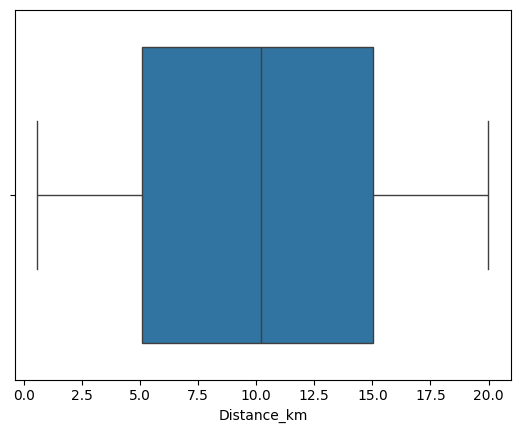

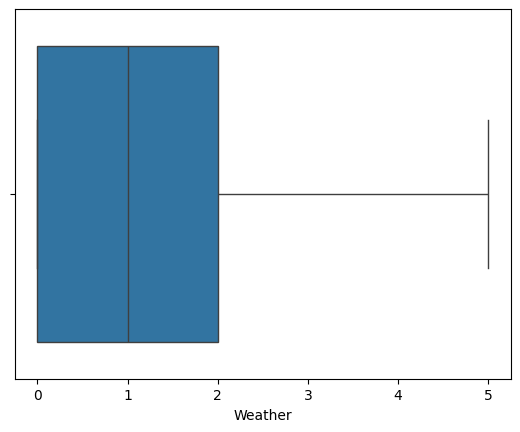

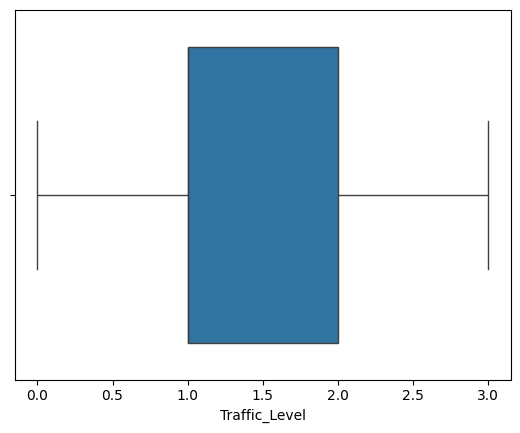

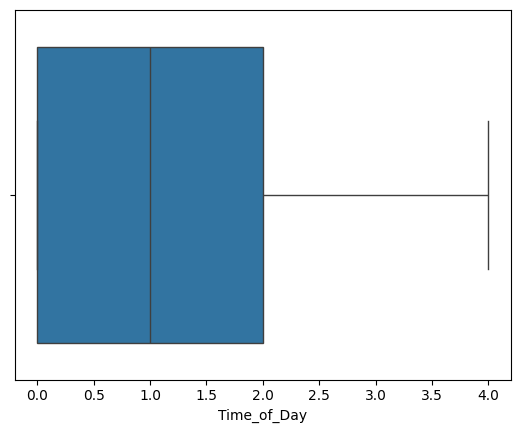

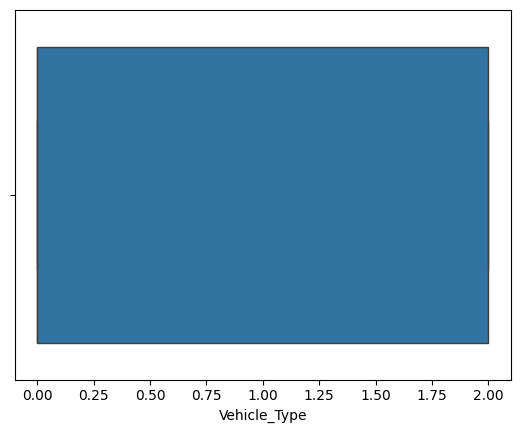

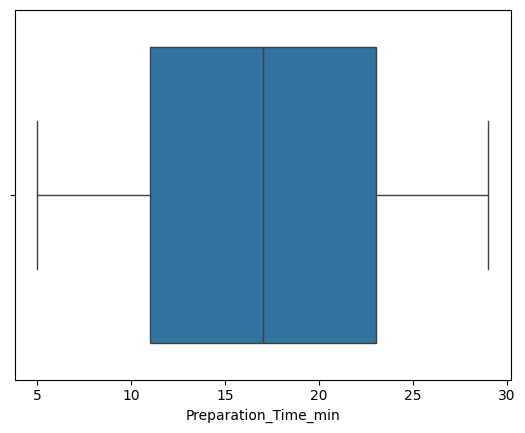

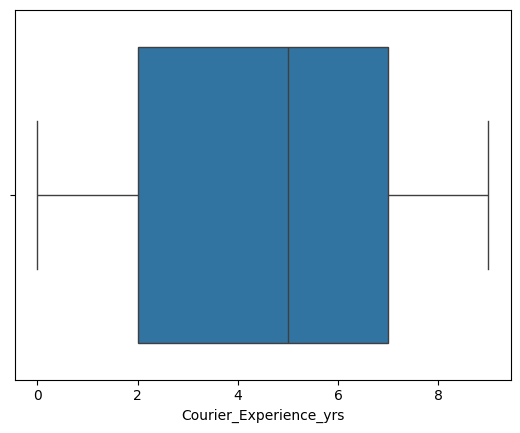

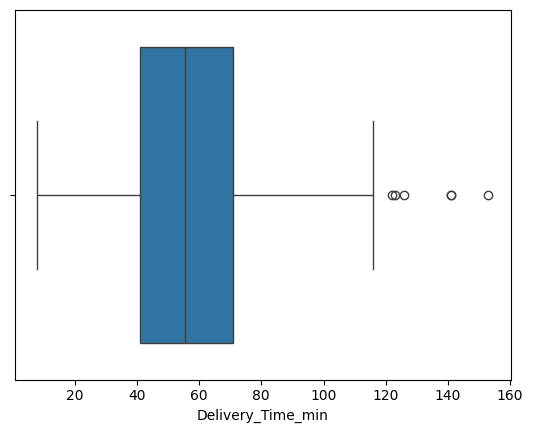

In [493]:
for col in delivery_time_df.columns:
    plt.figure()
    sns.boxplot(x=delivery_time_df[col],data=delivery_time_df)

### OBSERVATION -> only the column ["Delivery_time_min"] has some outliers

#### Removal of Outliers

In [494]:
print('Before outlier removal : ',delivery_time_df.shape)
z = np.abs(zscore(delivery_time_df, axis = 1))
z1=pd.DataFrame(z,columns=delivery_time_df.columns)
threshold = 3
delivery_dataset = delivery_time_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',delivery_dataset.shape)

Before outlier removal :  (1000, 8)
After Z-Score approach :  (970, 8)


#### Checking Skewness of data 

In [495]:
delivery_time_df.skew()
### OBSERVATION -> The skewness of all the columns are in the range [-3,3]

Distance_km               0.038840
Weather                   0.770821
Traffic_Level            -0.138348
Time_of_Day               0.451827
Vehicle_Type              0.401715
Preparation_Time_min      0.030008
Courier_Experience_yrs   -0.029087
Delivery_Time_min         0.507251
dtype: float64

#### Checking the Kurtosis of the data

In [496]:
delivery_time_df.kurt()
### OBSERVATION -> The kurtosis of all the columns are in the range [-3,3]

Distance_km              -1.229247
Weather                  -0.615339
Traffic_Level            -0.850312
Time_of_Day              -0.431952
Vehicle_Type             -1.575909
Preparation_Time_min     -1.236928
Courier_Experience_yrs   -1.266011
Delivery_Time_min         0.291338
dtype: float64

## Handling the missing values

In [497]:
### Since the columns ['Weather', 'Traffic_Level', 'Time_of_Day'] are object type to fill their missing values we have to use mode
delivery_time_df["Weather"]=delivery_time_df["Weather"].fillna(delivery_time_df["Weather"].mode())
delivery_time_df["Traffic_Level"]=delivery_time_df["Traffic_Level"].fillna(delivery_time_df["Traffic_Level"].mode())
delivery_time_df["Time_of_Day"]=delivery_time_df["Time_of_Day"].fillna(delivery_time_df["Time_of_Day"].mode())

### Column ["Courier_Experience_yrs"] is numeric we use median to fill missing values
delivery_time_df["Courier_Experience_yrs"]=delivery_time_df["Courier_Experience_yrs"].fillna(delivery_time_df["Courier_Experience_yrs"].median)

#### Scaling of data

In [ ]:
std_scalar=StandardScaler()
scaled_data=std_scalar.fit_transform(delivery_dataset)
delivery_dataset_scaled=pd.DataFrame(scaled_data,columns=delivery_dataset.columns)
delivery_dataset_scaled.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,-0.373372,1.755928,-0.316948,-1.210219,1.380865,-0.695598,-1.228807,-0.622997
1,1.119836,-0.882724,0.927746,-0.267317,-0.912695,0.415755,-0.885506,1.235573
2,-0.093725,-0.223061,-0.316948,1.618486,1.380865,1.527107,-1.228807,0.102298
3,-0.459552,0.436602,0.927746,-1.210219,1.380865,-1.668031,-1.228807,-0.894983
4,1.578879,-0.882724,-0.316948,0.675584,-0.912695,-0.139922,0.144399,0.510277


#### Splitting of the data

In [535]:
X=delivery_dataset_scaled.drop(["Delivery_Time_min"],axis=1)
Y=delivery_dataset_scaled["Delivery_Time_min"]

In [536]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80,random_state=42)

In [537]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(776, 7)
(194, 7)
(776,)
(194,)


In [538]:
gbr=xgboost.XGBRegressor(
                               n_estimators=100,
                               max_depth=1,
                               min_child_samples=3,
                               learning_rate=0.3                          
                           )

In [539]:
gbr.fit(x_train,y_train)

c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:46:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_child_samples" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [540]:
y_train_predict=gbr.predict(x_train)
y_test_predict=gbr.predict(x_test)

In [541]:
print("Train R2:", r2_score(y_train, y_train_predict))
print("Test R2 :", r2_score(y_test, y_test_predict))

Train R2: 0.7771927347491764
Test R2 : 0.7948183251107174


Que:2
You have a large dataset (500,000 rows, 50 features) for predicting whether a customer will purchase a product. The data contains missing values, categorical features, outliers in numerical data, and imbalanced classes (90% non-purchasers, 10% purchasers).
- Question:
How would you handle the missing data, outliers, and class imbalance before training a model, and which evaluation metrics would you prioritize to assess model performance?


1. Handling of missing values depends if the missing values in the column are more than 25% we have to remove the column,if it's less than that,there are 2 ways:
    1. If its a categorical data we use mode for handling 
    2. If its a numeric data column and there is no skewness we can use mean but if there is skewness median would be better metric of central tendency.

2. Outliers can be handled using the zscore or IQR if spreadness of the data is very close to centre and it will be difficult to remove from zscore .

4. Precision ,recall ,f1-score ,specificity and  confusion matrix will be evaluation metrics i would priortize.


Que:3
You’re tasked with segmenting 100,000 customers based on their purchasing behavior across various categories (electronics, fashion, home goods, etc.). The data includes both numerical and categorical features.

- Question:
Which clustering algorithm would you choose for this dataset, and how would you determine the optimal number of clusters?


Answer:


1. We can use Hierarchical Agglomerative clustering as it uses dendogram to form clusters and it handles the categotrical values efficiently and works well on overlapping clusters

2. The optimal number of clusters can be found using the elbow method ,the point at which a the graphs looks like the elbow joint we can take that point as number of clusters.

Other way could be to use sillhoutte score the point with highest score can be taken as number of cluster

To verify these ,There's an inbuilt function that called KneedLocator that calculates the optimal number of clusters.
